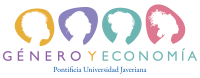



## **Sesión 3:  Nociones básicas de la Gran Encuesta Integrada de Hogares (GEIH) y   Uso de datos de la GEIH referentes a cuidado**
---
Autor: Linda Nataly Corredor Martínez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  Repaso de estructuras de control y librería Pandas.
1. El método merge de Pandas.
2. Construcción de base de datos de un mes en GEIH.
3. Limpieza de datos.
4. Creación de variables de Cuidado.
5. Algunas estadísticas descriptivas.

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 3.

## **Descarga de los datos**

`gdown` es una herramienta de línea de comandos que permite descargar archivos desde Google Drive directamente en la línea de comandos.

**Sintaxis:**

`!gdown --id [ID_DEL_ARCHIVO]`

*  [ID_DEL_ARCHIVO] es el identificador único del archivo que deseas descargar desde Google Drive. Este identificador se puede encontrar en la URL del archivo compartido en Google Drive.


In [1]:
# Descarga la carpet geih_2024 utilizando gdown
!gdown --id 1iKEuW-cqF1h9scmM3Mmbcb6UnQ0ZrsNI

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iKEuW-cqF1h9scmM3Mmbcb6UnQ0ZrsNI
To: /content/geih_2024.zip
100% 6.40M/6.40M [00:00<00:00, 128MB/s]


In [2]:
# Descomprime el archivo geih_2024.zip
!unzip geih_2024

Archive:  geih_2024.zip
   creating: geih_2024/final_marzo/
  inflating: geih_2024/sources_marzo/Fuerza de trabajo.CSV  
  inflating: geih_2024/sources_marzo/No ocupados.CSV  
  inflating: geih_2024/sources_marzo/Otros ingresos e impuestos.CSV  
  inflating: geih_2024/sources_marzo/Migración.CSV  
  inflating: geih_2024/sources_marzo/Otras formas de trabajo.CSV  
  inflating: geih_2024/sources_marzo/Ocupados.CSV  
  inflating: geih_2024/sources_marzo/Datos del hogar y la vivienda.CSV  
  inflating: geih_2024/sources_marzo/Características generales, seguridad social en salud y educación.CSV  


## **Importando Librerías**



In [3]:
import glob           # Para utilizar patrones de búsqueda de archivos
import os             # Para interactuar con el sistema operativo
import pandas as pd   # Para el manejo de datos en DataFrames

## **2.Construcción de base de datos de un mes en GEIH.**

Los microdatos que se van a usar en esta sesión se ecuentran disponibles en el siguiente link: https://microdatos.dane.gov.co/index.php/catalog/819/get-microdata

A continuación, se presentan las bases de datos disponibles por mes, en los microdatos de la Gran Encuesta Integrada de Hogares. Estas bases de datos ofrecen información sobre la fuerza laboral (empleo, desempleo e inactividad) y otras variables demográficas (sexo, edad, estado civil, educación, etc.). También abarca ingresos familiares, características de vivienda, acceso a servicios y programas, sistema de protección social y calidad del empleo.

* Caracteristicas generales, seguridad social en salud y educación
* Ocupados
* Fuerza de trabajo
* No ocupados
* Otras formas de trabajo
* Migración
* Otros ingresos e impuestos
* Datos del hogar y la vivienda



**Funciones**

In [4]:
#Definiendo función para cargar el archivo csv
def load_csv(path):
    """
    Carga un archivo CSV desde la ruta especificada y devuelve el nombre del
    archivo (sin extensión) y su contenido en un DataFrame.

    Parámetros:
    path (str): La ruta al archivo CSV que se desea cargar.

    Retornos:
    tuple: Una tupla que contiene:
        - name (str): El nombre del archivo sin la extensión ".CSV".
        - df_load (pd.DataFrame): El contenido del archivo CSV en un DataFrame de pandas.
    """

    # Obtener el nombre del archivo sin la extensión ".CSV" a partir de la ruta
    name = os.path.split(path)[1].replace(".CSV", "")

    # Leer el archivo CSV y almacenarlo en un DataFrame
    df_load = pd.read_csv(path, sep=";", encoding='unicode_escape', low_memory=False)

    return name, df_load

In [5]:
# Creación del diccionario que contiene los dataframes
def create_dict_df(paths):
    """
    Crea un diccionario donde las claves son los nombres de los archivos CSV
    (sin extensión) y los valores son los DataFrames que contienen los datos
    de los archivos CSV correspondientes.

    Parámetros:
    paths (list): Una lista de rutas a archivos CSV.

    Retornos:
    dict: Un diccionario donde las claves son los nombres de los archivos CSV
          (sin extensión) y los valores son los DataFrames que contienen los
          datos de los archivos CSV correspondientes.
    """

    # Inicializar un diccionario vacío para almacenar los DataFrames
    dict_data = {}

    # Iterar sobre cada ruta de archivo en la lista de rutas
    for module in paths:
        # Obtener el nombre del archivo y cargar los datos del CSV
        name, load_data = load_csv(module)

        # Agregar el DataFrame al diccionario usando el nombre del archivo como clave
        dict_data[name] = load_data

    # Retornar el diccionario creado
    return dict_data

**Definición de directorios**

In [13]:
#Directorio de datos originales
sources_path = '/content/geih_2024/sources_marzo'
#Directorio de datos procesados
path_data_final = '/content/geih_2024/final_marzo'

print(f'Path de data original:{sources_path}, Path data procesada:{path_data_final}')

Path de data original:/content/geih_2024/sources_marzo, Path data procesada:/content/geih_2024/final_marzo


In [14]:
# Listamos los archivos que se encuentran en la carpeta sources_path
paths = glob.glob(sources_path + '/*')
paths

['/content/geih_2024/sources_marzo/Fuerza de trabajo.CSV',
 '/content/geih_2024/sources_marzo/Datos del hogar y la vivienda.CSV',
 '/content/geih_2024/sources_marzo/Migración.CSV',
 '/content/geih_2024/sources_marzo/Ocupados.CSV',
 '/content/geih_2024/sources_marzo/Otras formas de trabajo.CSV',
 '/content/geih_2024/sources_marzo/Características generales, seguridad social en salud y educación.CSV',
 '/content/geih_2024/sources_marzo/Otros ingresos e impuestos.CSV',
 '/content/geih_2024/sources_marzo/No ocupados.CSV']

In [ ]:
# Miramos si las funciones se construyeron bien y se evalúan.
print(create_dict_df(paths))

**Evaluación de las funciones: Guardando diccionario de DataFrames**

In [16]:
# Evaluación de la función create_dict_df(paths)
dict_data = create_dict_df(paths)

# Imprimir las claves del diccionario
print(dict_data.keys())

dict_keys(['Fuerza de trabajo', 'Datos del hogar y la vivienda', 'Migración', 'Ocupados', 'Otras formas de trabajo', 'Características generales, seguridad social en salud y educación', 'Otros ingresos e impuestos', 'No ocupados'])


**Unión (merge) de las bases de datos que se encuentra en el diccionario** `dict_data`

In [20]:
# DataFrame principal
data = dict_data['Características generales, seguridad social en salud y educación']

# Lista de categorías a fusionar en el DataFrame 'data'
orther = ['No ocupados', 'Fuerza de trabajo', 'Migración','Ocupados', 'Otras formas de trabajo', 'Otros ingresos e impuestos']

# Fusionando los DataFrames correspondientes a las categorías en 'orther' con el DataFrame 'data'
for file_data in orther:
    data = pd.merge(data, dict_data[file_data], on=["DIRECTORIO", "SECUENCIA_P", "ORDEN"], how="left", validate="1:1", suffixes=(None,"_x"))

# Fusionando el DataFrame 'data' con los datos del hogar y la vivienda
data = pd.merge(data, dict_data['Datos del hogar y la vivienda'], on=["DIRECTORIO", "SECUENCIA_P"], how="left", validate="m:1", suffixes=(None,"_x"))

# Eliminando las columnas duplicadas que resultaron de las fusiones
columns_delete = [i for i in data.columns if "_x" in i]
data.drop(columns=columns_delete, inplace=True)

# Convirtiendo los nombres de las columnas a minúsculas y renombrando las columnas en el DataFrame 'data'
lower_columns = [i.lower() for i in data.columns]
rename_dict = dict(zip(data.columns, lower_columns))
data.rename(columns=rename_dict, inplace=True)

# Imprimiendo la primeras filas de la base de datos final
data.head()

,periodo,mes,per,directorio,secuencia_p,orden,hogar,regis,area,clase,...,p5222s3,p5222s4,p5222s5,p5222s6,p5222s7,p5222s8,p5222s9,p5222s10,p5222s8a1,p6008
0,20240311,3,2024,7713749,1,1,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
1,20240311,3,2024,7713749,1,2,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
2,20240311,3,2024,7713749,1,3,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
3,20240311,3,2024,7713749,1,4,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5
4,20240311,3,2024,7713749,1,5,1,10,NaN,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5


**Guardando el Dataframe unido en la carpeta de paths final en Drive.**

In [21]:
# Definiendo la ruta de salida del archivo CSV en la carpeta final en Drive
path_out = os.path.join(path_data_final,'marzo' +'.csv')

# Creando un registro del camino de salida para referencia
log_out = f'Carpeta de salida  = {path_out}'

# Guardando el DataFrame en un archivo CSV en la ruta de salida, sin incluir el índice
data.to_csv(path_out, index=False)

# Imprimiendo la ruta de salida
print(log_out)

Carpeta de salida  = /content/geih_2024/final_marzo/marzo.csv


##**Comprobando que el DataFrame esté bien construido**

Las cifras de mercado laboral que se presentan en la siguiente celda de código: se comparan con el anexo de la GEIH-2024 (archivo de excel) de la hoja Total Nacional en esta hoja se encuentran las series para el rango de años 2001 a 2024.

Revisaremos el mes de marzo de 2024, en especial las filas que se presentan a continuación:  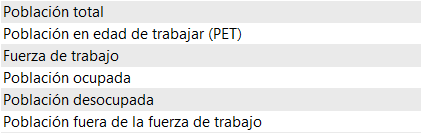

Este documento se encuetra en el siguiente link:

https://www.dane.gov.co/files/operaciones/GEIH/anex-GEIH-mar2024.xlsx



---

**Nota aclaratoria uso de factor de expansión:**

Cada una de las bases contiene un campo con el nombre "fex_c18" el cual almacena  el factor de expansión mensual de cada registro. Este factor de expansión indica el número de personas que representa el entrevistado en la población.

El factor de expansión (fex_c18) se modifica de acuerdo con la información que se necesite:
*   Datos mensuales no se deben hacer cambios (el factor es mensual).
*   Datos trimestrales se debe dividir en 3.
*   Datos semestrales se divide en 6.
*   Información anual se divide en 12.
---



In [ ]:
# Definimos las variables que queremos utilizar de mercado laboral
variables_ml = ['pt', 'pet', 'ft', 'oci', 'dsi', 'fft']

# Creamos un diccionario para almacenar los resultados redondeados de cada variable
results_ml_dict = {}

# Calculamos el resultado para cada variable, lo redondeamos y lo almacenamos en el diccionario
for variable in variables_ml:
    test = (data[variable] * data['fex_c18']).sum() / 1000
    rounded_test = round(test)  # Redondeamos el resultado a 2 decimales
    results_ml_dict[variable] = rounded_test

# Convertimos el diccionario en un DataFrame
results_ml_df = pd.DataFrame.from_dict(results_ml_dict, orient='index', columns=['Result'])

# Mostramos el diccionario con los resultados
results_ml_df.head()

In [ ]:
#Total de registros (filas del DataFrame)
len(data)

In [ ]:
#Tamaño (filas, columnas)
data.shape

In [ ]:
# Visualización de los tipos de datos de las columnas.
data.dtypes

In [ ]:
# Imprimiendo la primeras filas de la base de datos final
data.head()

In [ ]:
# Imprimiendo la últimas filas de la base de datos final
data.head()

## **3. Pequeña limpieza de datos.**


Mirando la columna relacionada con las variable de sexo.

**Consideraciones de la variable p3271:**


---


La pregunta asociada es: ¿Cuál fue su sexo al nacer?
Las categorías de los valores son:

    1 Masculino
    2 Femenino

In [ ]:
# Obtener la frecuencia de los valores y el tipo de datos de la columna
frecuencia_valores = data['p3271'].value_counts()

# Mostrar la frecuencia de los valores
print("Frecuencia de los valores de la columna:")
print(frecuencia_valores)

Frecuencia de los valores de la columna:
p3271
2    37854
1    32865
Name: count, dtype: int64


In [ ]:
!wget https://drive.google.com/file/d/1E4rRRvilx0_srpTOEJHfBEUMmPsEFtyl/view?usp=sharing

--2024-06-03 23:45:24--  https://drive.google.com/file/d/1E4rRRvilx0_srpTOEJHfBEUMmPsEFtyl/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.100, 172.217.204.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  84.83K  --.-KB/s    in 0.005s  

2024-06-03 23:45:24 (15.3 MB/s) - ‘view?usp=sharing’ saved [86871]



In [ ]:
# Mirando si el total de personas tienen observaciones para la variable de sexo
suma_sexo = 37854+ 32865
print(suma_sexo)
data['pt'].value_counts()

70719


pt
1    70719
Name: count, dtype: int64

In [ ]:
# Renombrando columna asociada a p3271 en el DataFrame
data.rename(columns={'p3271': 'sexo'}, inplace=True)

In [ ]:
# Comprobando el cambio de nombre de la columna
print(f"¿La columna 'sexo' se encuentra en el dataframe? = {'sexo' in data.columns}")
print(f"¿La columna 'p3271' se encuentra en el dataframe? = {'p3271' in data.columns}")

¿La columna 'sexo' se encuentra en el dataframe? = True
¿La columna 'p3271' se encuentra en el dataframe? = False


In [ ]:
# Veamos una parte de la columna
data.iloc[:10][["sexo"]]

In [ ]:
# Modificar los valores de la columna: 1 -> 0 (Masculino), 2 -> 1 (Femenino)
data['sexo'] = data['sexo'].map({1: 0, 2: 1})

In [ ]:
# Etiquetar los valores de la columna: 0 -> 'Masculino', 1 -> 'Femenino'
data['sexo'] = data['sexo'].map({0: 'Masculino', 1: 'Femenino'})

In [ ]:
# Agrupar por 'sexo' y calcular la suma ponderada usando el factor de expansión
tabla = data.groupby('sexo').apply(lambda x: (x['fex_c18']).sum()/1000).reset_index(name='suma_ponderada')
tabla

,sexo,suma_ponderada
0,Femenino,26389.920
1,Masculino,25009.591



**Ejercicio:**


---


Con base en los que hemos hecho con la variable de sexo, haz este proceso con la variable "p6040" que es la variable asociada a la pregunta ¿Cuántos años cumplidos tiene … ?


---

*Pistas:*
1. Utiliza el método value_counts() para obtener la frecuencia de los valores de la columna 'respuesta'.
2. Renombra la columna p6040, por edad.




## **4. Creación de variables de Cuidado**







**Demanda de cuidado**

---



La demanda de cuidado se refiere a la necesidad de atención y asistencia en diversas etapas de la vida debido a circunstancias como discapacidad, enfermedad o envejecimiento. Esta demanda involucra la interacción entre quien requiere cuidado y quien lo brinda, generando cambios en sus condiciones (DANE, 2023).

En términos de demanda de cuidado, es crucial definir categorías de población que requieren atención específica, como la primera infancia (0-4 años), infancia (5-9 años), adolescencia (10-14 años), personas mayores de 65 años en el hogar, y personas con discapacidad en el hogar. Estas variables permiten identificar y cuantificar los diferentes grupos demográficos que necesitan cuidados.


In [ ]:
# Personas menores de 5 años
data.loc[:,"primera_infancia"] = data["p6040"].apply(lambda x : 1 if x < 5 else 0)
# Verificamos si la variable está bien construida
data[data["primera_infancia"]==1][["p6040","primera_infancia"]]

,p6040,primera_infancia
44,2,1
47,0,1
66,0,1
77,2,1
92,0,1
...,...,...
70610,2,1
70642,1,1
70661,2,1
70717,4,1


**P1906S4:** Dada su condición física y mental, en su vida diaria tiene dificultades para realizar las siguientes actividades:  d. ¿Mover el cuerpo, caminar o subir y bajar escaleras.

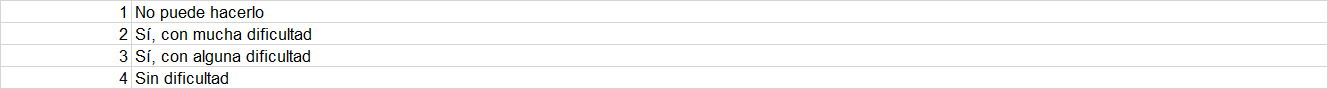

In [ ]:
# Personas en condición de discapacidad: Limitaciones en el movimiento corporal
data.loc[:,"no_mov_corp"] = data["p1906s4"].apply(lambda x : 1 if (x == 1 or x==2)  else 0)
# Selecciona las filas en las que el valor de "no_mov_corp" es igual a 1 y muestra las columnas "p1906s4" y "no_mov_corp".
data[data["no_mov_corp"]==1][["p1906s4","no_mov_corp"]]

,p1906s4,no_mov_corp
73,2,1
80,2,1
86,2,1
90,2,1
143,2,1
...,...,...
70445,2,1
70484,2,1
70563,2,1
70564,2,1


**Oferta de cuidado**

---
***Sector de cuidado (cuidado remunerado):***

**CUIDADO DIRECTO**

**Servicios de cuidado a grupos determinados**
+ 8511 Educación de la primera infancia
+ 8512 Educación preescolar
+ 8513 Educación básica primaria
+ 8720 Actividades de atención residencial, para el cuidado de pacientes con retardo mental, enfermedad mental y consumo de sustancias psicoactivas
+ 8730 Actividades de atención en instituciones para el cuidado de personas mayores y/o discapacitadas
+ 8810 Actividades de asistencia social sin alojamiento para personas mayores y discapacitadas

**Salud humana y asistencia social**
+ 8610 Actividades de hospitales y clínicas, con internación
+ 8621 Actividades de la práctica médica, sin internación
+ 8691 Actividades de apoyo diagnóstico
+ 8692 Actividades de apoyo terapéutico
+ 8699 Otras actividades de atención de la salud humana
+ 8710 Actividades de atención residencial medicalizada de tipo general
+ 8790 Otras actividades de atención en instituciones con alojamiento
+ 8890 Otras actividades de asistencia social sin alojamiento


---
**CUIDADO INDIRECTO**

**Servicio doméstico**
+ 9700 Actividades de los hogares individuales como empleadores de personal doméstico

**Servicios de comidas preparadas**
+ 5611 Expendio a la mesa de comidas preparadas
+ 5612 Expendio por autoservicio de comidas preparadas
+ 5613 Expendio de comidas preparadas en cafeterías
+ 5619 Otros tipos de expendio de comidas preparadas n.c.p.

**Lavado de ropa**
+ 9601 Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de pie

---
**OTROS**

**Peluquería**
+ 9602 Peluquería y otros tratamientos de belleza


**Sector de cuidado: Cuidado Directo**


---


Asignar un valor que indica si una persona trabaja en el sector de cuidado directo- específicamente en servicio a grupos determinados.

In [ ]:
# Utiliza la función `apply` para aplicar una función lambda a cada elemento de la columna "rama4d_r4"
data.loc[:,"cuidado_grp_det"] = data["rama4d_r4"].apply(
    # La función lambda evalúa si el valor de la columna "rama4d_r4" es uno de los siguientes: 8512, 8513, 8720, 8730 o 8810
    lambda x : 1 if (
        x==8512 or x==8513 or x==8720 or x==8730 or x==8810)  else 0)
  # Si el valor es uno de los mencionados, la función devuelve 1, indicando que pertenece al grupo de cuidado directo-servicio
  # Si no, devuelve 0, indicando que no pertenece a dicho grupo

# Filtra el DataFrame `data` para obtener sólo las filas donde la columna "cuidado_grp_det" es igual a 1
# Luego selecciona y muestra las columnas "rama4d_r4" y "cuidado_grp_det" de esas filas
data[data["cuidado_grp_det"]==1][["rama4d_r4","cuidado_grp_det"]]

,rama4d_r4,cuidado_grp_det
689,8730.0,1
4066,8512.0,1
4299,8512.0,1
4376,8810.0,1
5014,8730.0,1
...,...,...
68327,8810.0,1
68968,8730.0,1
68969,8730.0,1
70025,8512.0,1


In [ ]:
# Filtra el DataFrame `data` para obtener sólo las filas donde la columna "cuidado_grp_det" es igual a 1
servicios_area = data[data["cuidado_grp_det"]==1][["area","rama4d_r4","cuidado_grp_det","fex_c18"]]

# Crea una nueva columna "cuidado_grp_det_fex" en el DataFrame `servicios_area`
servicios_area.loc[:,"cuidado_grp_det_fex"] = servicios_area["cuidado_grp_det"] * servicios_area["fex_c18"]

# Luego, se selecciona la columna "cuidado_grp_det_fex" y se calcula la suma de sus valores para cada area
servicios_area.groupby(["area"], as_index = False)[["cuidado_grp_det_fex"]].sum()

,area,cuidado_grp_det_fex
0,5.0,7696.369831
1,8.0,1737.096749
2,11.0,2031.898960
3,13.0,1337.966851
4,15.0,402.543048
5,17.0,369.208854
6,18.0,62.004689
7,19.0,1379.035088
8,20.0,868.924898
9,23.0,229.855088


**Cuidado  no remunerado**


---

**CUIDADO DIRECTO**

+ p3079: Cuidar niñas o niños menores de 5 años que no estén enfermos ni en condición de discapacidad
+ p3081: Cuidar personas enfermas, en condición de discapacidad o adultos mayores
+ p3082: Ayudar a personas con tareas o trabajos escolares


---

**CUIDADO INDIRECTO**

+ p3076: Cocinar, lavar los platos, poner la mesa
+ p3077: Lavar, colgar, planchar la ropa, reparar ropa
+ p3078: Limpiar o arreglar la casa, tender las camas, barrer trapear, sacar la basura
+ p3089: Preparar conservas, quesos o embutidos
+ p3091: Elaborar prendas de vestir
---

**OTROS**
+ vol: Horas a la semana dedicadas a voluntariado
+ vol: Horas al día dedicadas a voluntariado


**Tiempos de cuidado**


---


Asignar un valor que indica si se dedica tiempo a una persona que requiere cuidado: personas enfermas, en condición de discapacidad o adultos mayores en el hogar


**p3081s1:**  Cuidar personas enfermas, en condición de discapacidad o adultos mayores en: a. Su hogar? (1: Si; 2:No)

In [ ]:
#Acceso a la columna p3081s1
data["p3081s1"]

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
70714    2.0
70715    2.0
70716    NaN
70717    NaN
70718    NaN
Name: p3081s1, Length: 70719, dtype: float64

**p3081s1a1**: Cuidar personas enfermas, en condición de discapacidad o adultos mayores en: Días

In [ ]:
data["p3081s1a1"].unique() #dias de la semana

array([nan,  7.,  5.,  6.,  2.,  3.,  1.,  4.])

In [ ]:
data["p3081s1a2"].unique() # Horas por dia

array([nan, 12.,  8., 10.,  2.,  1.,  4.,  3.,  6.,  5., 15., 16., 24.,
       14.,  7., 20.,  9., 18., 17., 13.])

In [ ]:
data["horas_semana_cuid_may"] = data.apply(lambda x : x["p3081s1a1"]*x["p3081s1a2"] if (x["p3081s1"] == 1)  else 0 , axis = 1)
data[data["horas_semana_cuid_may"]!=0][["p3081s1a1","p3081s1a2","p3081s1","horas_semana_cuid_may"]]

,p3081s1a1,p3081s1a2,p3081s1,horas_semana_cuid_may
72,7.0,12.0,1.0,84.0
79,7.0,8.0,1.0,56.0
83,7.0,10.0,1.0,70.0
382,7.0,2.0,1.0,14.0
468,5.0,1.0,1.0,5.0
...,...,...,...,...
70292,7.0,5.0,1.0,35.0
70293,7.0,6.0,1.0,42.0
70479,3.0,1.0,1.0,3.0
70507,7.0,2.0,1.0,14.0


## **5. Algunas estadísticas descriptivas**

En esta sección, nos sumergiremos en un análisis exploratorio que tiene como objetivo abordar preguntas de interés y validar hipótesis relevantes. Exploraremos diversas estadísticas descriptivas para comprender mejor nuestros datos y obtener insights valiosos que guíen nuestro análisis más detallado.

In [27]:
# Estadísticos de las columnas numéricas
data.describe()

,periodo,mes,per,directorio,secuencia_p,orden,hogar,regis,area,clase,...,p5222s2,p5222s3,p5222s4,p5222s5,p5222s6,p5222s7,p5222s8,p5222s9,p5222s10,p6008
count,7.071900e+04,70719.0,70719.0,7.071900e+04,70719.000000,70719.000000,70719.000000,70719.0,51330.000000,70719.000000,...,46943.0,297.0,2002.0,528.0,4165.0,6163.0,1303.0,22105.0,85.0,70719.000000
mean,2.024031e+07,3.0,2024.0,7.727889e+06,1.008993,2.358447,1.008993,10.0,41.791097,1.128721,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.716894
std,1.174523e+00,0.0,0.0,8.208445e+03,0.111189,1.463213,0.111189,0.0,26.748870,0.334893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.794187
min,2.024031e+07,3.0,2024.0,7.713749e+06,1.000000,1.000000,1.000000,10.0,5.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
25%,2.024031e+07,3.0,2024.0,7.720822e+06,1.000000,1.000000,1.000000,10.0,17.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000
50%,2.024031e+07,3.0,2024.0,7.727900e+06,1.000000,2.000000,1.000000,10.0,44.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000
75%,2.024031e+07,3.0,2024.0,7.735140e+06,1.000000,3.000000,1.000000,10.0,66.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.000000
max,2.024031e+07,3.0,2024.0,7.742092e+06,4.000000,20.000000,4.000000,10.0,99.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.000000


In [ ]:
# Visualización de un subconjunto de columnas
data[
    ['sexo',
     'edad',
     'inglabo',
      ]].describe()